In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
path = 'notebooks/xomnia_chat_android.txt'

In [44]:
with open(path, 'r', encoding="utf-8") as f:
    text = f.read()

In [45]:
message_regex = r"(\d{2}/\d{2}/\d{4}, \d{2}:\d{2})"
datetime_format = "%d/%m/%Y, %H:%M"

In [46]:
split_messages = re.split(message_regex, text)
        # turn the "flat" list into a list of tuples containing the date and the text
zipped_messages = list(zip(split_messages[1::2], split_messages[2::2]))
df = pd.DataFrame(zipped_messages, columns=['timestamp', 'text'])

In [47]:
df[['sender', 'message']] = df.text.str.extract("(.*?): (.*)", expand=True, flags=re.DOTALL)

In [48]:
df = df[(df.text.str.match(".*:.*")) & ~(df.text.str.match(".*Master:.*"))].reset_index(drop=False)

In [49]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format=datetime_format, yearfirst=False)
df = df.sort_values('timestamp', ascending=True)

In [50]:
df.head()

,index,timestamp,text,sender,message
0,3,2019-01-07 11:46:00,- +31 6 24422467: Lunch wordt later verzorgd\n,- +31 6 24422467,Lunch wordt later verzorgd\n
1,4,2019-01-07 11:46:00,- +31 6 36157056: Maar wel verzorgd!:)\n,- +31 6 36157056,Maar wel verzorgd!:)\n
2,5,2019-01-07 11:51:00,- +31 6 24422467: 🙂\n,- +31 6 24422467,🙂\n
3,6,2019-01-07 12:11:00,- +31 6 24422467: De lunch staat klaar\n,- +31 6 24422467,De lunch staat klaar\n
4,7,2019-01-07 12:25:00,"- Ollie Dapper: Welcome Robin, Jonas, Anna en...",- Ollie Dapper,"Welcome Robin, Jonas, Anna en Michiel!!!\n"


In [53]:
df['year'] = df['timestamp'].dt.year

In [54]:
df['month'] = df['timestamp'].dt.month

In [56]:
df['day'] = df['timestamp'].dt.day

In [57]:
df.head()

,index,timestamp,text,sender,message,year,month,day
0,3,2019-01-07 11:46:00,- +31 6 24422467: Lunch wordt later verzorgd\n,- +31 6 24422467,Lunch wordt later verzorgd\n,2019,1,7
1,4,2019-01-07 11:46:00,- +31 6 36157056: Maar wel verzorgd!:)\n,- +31 6 36157056,Maar wel verzorgd!:)\n,2019,1,7
2,5,2019-01-07 11:51:00,- +31 6 24422467: 🙂\n,- +31 6 24422467,🙂\n,2019,1,7
3,6,2019-01-07 12:11:00,- +31 6 24422467: De lunch staat klaar\n,- +31 6 24422467,De lunch staat klaar\n,2019,1,7
4,7,2019-01-07 12:25:00,"- Ollie Dapper: Welcome Robin, Jonas, Anna en...",- Ollie Dapper,"Welcome Robin, Jonas, Anna en Michiel!!!\n",2019,1,7


In [61]:
df['month'].value_counts()

1    523
3    486
2    436
Name: month, dtype: int64

In [69]:
df['day'].value_counts().sort_values(axis=0, ascending=False)

1     123
8     112
25     91
18     84
5      72
14     72
11     68
7      65
19     64
28     63
15     63
6      58
9      55
22     52
10     43
17     42
23     40
20     33
27     31
21     29
29     25
24     24
31     21
13     20
2      20
26     19
16     18
4      16
30     12
12     10
Name: day, dtype: int64

In [73]:
df['sender'].nunique()

82

In [86]:
df['sender'].value_counts()

 - Monica Kürüm          172
 - Ollie Dapper          148
 - +31 6 36157056         82
 - William van Lith       72
 - +31 6 19433610         65
 - +31 6 12779755         49
 - +31 6 49922015         45
 - Yu Ri Tan              36
 - +31 6 52671309         35
 - Lisanne Rijnveld       33
 - +31 6 15313052         32
 - +31 6 30143625         31
 - +31 6 40505362         30
 - +31 6 39778668         28
 - +31 6 37021682         28
 - +31 6 29242318         28
 - +31 6 53535162         26
 - +31 6 34749970         25
 - +31 6 34041415         24
 - Aniek van der Werf     22
 - +44 7537 895333        22
 - +31 6 24422467         22
 - +31 6 10779001         21
 - Anna Commandeur        20
 - Tim Reus               19
 - Marlot Schuuring       18
 - +31 6 46311315         16
 - +31 6 11647020         15
 - +31 6 13633963         14
 - +31 6 55224791         14
                        ... 
 - +31 6 51649941          5
 - +31 6 11333003          5
 - +31 6 34847614          5
 - +31 6 13368

In [88]:
df['sender'].value_counts() / df['sender'].nunique()

 - Monica Kürüm          2.097561
 - Ollie Dapper          1.804878
 - +31 6 36157056        1.000000
 - William van Lith      0.878049
 - +31 6 19433610        0.792683
 - +31 6 12779755        0.597561
 - +31 6 49922015        0.548780
 - Yu Ri Tan             0.439024
 - +31 6 52671309        0.426829
 - Lisanne Rijnveld      0.402439
 - +31 6 15313052        0.390244
 - +31 6 30143625        0.378049
 - +31 6 40505362        0.365854
 - +31 6 39778668        0.341463
 - +31 6 37021682        0.341463
 - +31 6 29242318        0.341463
 - +31 6 53535162        0.317073
 - +31 6 34749970        0.304878
 - +31 6 34041415        0.292683
 - Aniek van der Werf    0.268293
 - +44 7537 895333       0.268293
 - +31 6 24422467        0.268293
 - +31 6 10779001        0.256098
 - Anna Commandeur       0.243902
 - Tim Reus              0.231707
 - Marlot Schuuring      0.219512
 - +31 6 46311315        0.195122
 - +31 6 11647020        0.182927
 - +31 6 13633963        0.170732
 - +31 6 55224

In [90]:
df['hours'] = df['timestamp'].dt.hour

In [92]:
df['minuten'] = df['timestamp'].dt.minute

C:\Users\robin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


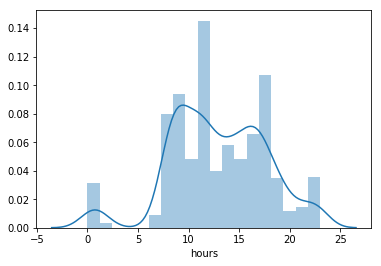

In [93]:
sns.distplot(df['hours'])

In [116]:
df.groupby(by=df['timestamp'].dt.weekday).agg({'day':['count'], 'hours':['count', 'max', 'min']})


day hours        
          count count max min
timestamp                    
0           135   135  22   7
1           183   183  23   7
2           212   212  21   8
3           305   305  23   8
4           499   499  23   0
5            93    93  23   0
6            18    18  20   0

In [150]:
df.groupby(by=df['timestamp'].dt.weekday).agg({'day':['count'], 'hours':['max', 'min']})

day hours    
          count   max min
timestamp                
0           135    22   7
1           183    23   7
2           212    21   8
3           305    23   8
4           499    23   0
5            93    23   0
6            18    20   0

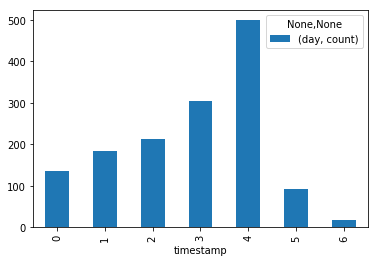

In [162]:
df.groupby(by=df['timestamp'].dt.weekday).agg({'day':['count']}).plot(kind='bar')

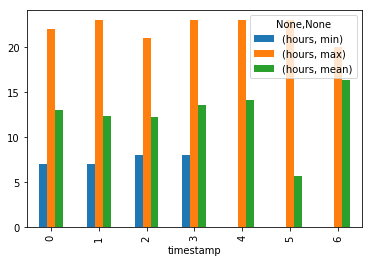

In [181]:
df.groupby(by=df['timestamp'].dt.weekday).agg({'hours':['min', 'max', 'mean']}).plot(kind='bar')